In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
model = keras.models.load_model('model_2024_hairstyle.keras')

## Question 1
Now convert this model from Keras to TF-Lite format.

What's the size of the converted model?

In [3]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('model_2024_hairstyle.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\YULIYA~1\AppData\Local\Temp\tmp52p7nhxe\assets


INFO:tensorflow:Assets written to: C:\Users\YULIYA~1\AppData\Local\Temp\tmp52p7nhxe\assets


Saved artifact at 'C:\Users\YULIYA~1\AppData\Local\Temp\tmp52p7nhxe'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2565181415216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2565181420144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2565181697968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2565181699904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2565181701136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2565181839616: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [4]:
import tensorflow.lite as tflite

In [5]:
interpreter = tflite.Interpreter(model_path='model_2024_hairstyle.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']

In [6]:
output_index = interpreter.get_output_details()[0]['index']

##  Question 2
To be able to use this model, we need to know the index of the input and the index of the output.

What's the output index for this model?

In [7]:
output_index

13

In [8]:
#!pip install pillow

In [9]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

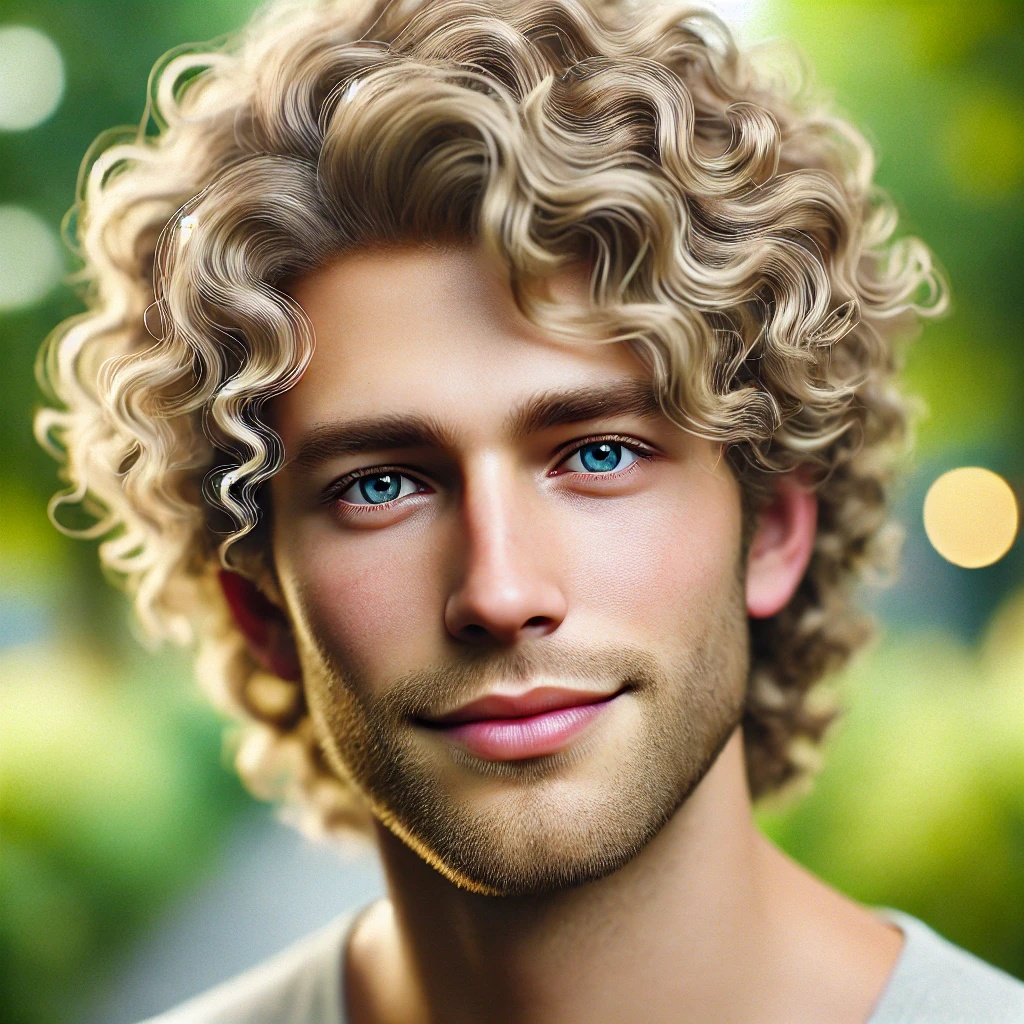

In [10]:
img = download_image('https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg')
img

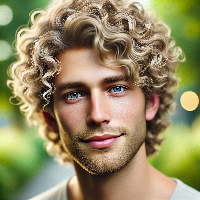

In [11]:
img = prepare_image(img, target_size=(200,200))
img

In [12]:
def prepare_input(x):
    return x*(1/255.0)

In [13]:
x = np.array(img,dtype = 'float32')
X= np.array([x])
X = prepare_input(X)

## Question 3
Now we need to turn the image into numpy array and pre-process it.

Tip: Check the previous homework. What was the pre-processing we did there?

After the pre-processing, what's the value in the first pixel, the R channel?

In [14]:
X[0,0,0,0]

np.float32(0.2392157)

## Question 4
Now let's apply this model to this image. What's the output of the model?

In [15]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [16]:
preds

array([[0.89377415]], dtype=float32)

## Question 5
Download the base image agrigorev/model-2024-hairstyle:v3. You can do it with docker pull.

So what's the size of this base image?

In [21]:
#!docker pull agrigorev/model-2024-hairstyle:v3

v3: Pulling from agrigorev/model-2024-hairstyle
Digest: sha256:6d0aa19127467401fd439c76e662ceba2bd21a5713f174d4f89b354a26939ea6
Status: Image is up to date for agrigorev/model-2024-hairstyle:v3
docker.io/agrigorev/model-2024-hairstyle:v3


In [22]:
#!docker images

REPOSITORY                       TAG       IMAGE ID       CREATED          SIZE
model-2024-hairstyle-lambda      latest    840f89b515a9   22 minutes ago   1.27GB
agrigorev/model-2024-hairstyle   v3        6d0aa1912746   8 days ago       1.14GB


## Question 6
Now let's extend this docker image, install all the required libraries and add the code for lambda.

You don't need to include the model in the image. It's already included. The name of the file with the model is model_2024_hairstyle_v2.tflite and it's in the current workdir in the image (see the Dockerfile above for the reference). The provided model requires the same preprocessing for images regarding target size and rescaling the value range than used in homework 8.

Now run the container locally.

Score this image: https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg

What's the output from the model?

In [23]:
#!docker build -t model-2024-hairstyle-lambda .

#0 building with "desktop-linux" instance using docker driver

#1 [internal] load build definition from Dockerfile
#1 transferring dockerfile: 288B 0.0s done
#1 DONE 0.0s

#2 [internal] load metadata for docker.io/agrigorev/model-2024-hairstyle:v3
#2 DONE 0.0s

#3 [internal] load .dockerignore
#3 transferring context: 2B done
#3 DONE 0.0s

#4 [internal] load build context
#4 transferring context: 40B 0.0s done
#4 DONE 0.1s

#5 [1/3] FROM docker.io/agrigorev/model-2024-hairstyle:v3@sha256:6d0aa19127467401fd439c76e662ceba2bd21a5713f174d4f89b354a26939ea6
#5 resolve docker.io/agrigorev/model-2024-hairstyle:v3@sha256:6d0aa19127467401fd439c76e662ceba2bd21a5713f174d4f89b354a26939ea6
#5 ...

#6 [auth] agrigorev/model-2024-hairstyle:pull token for registry-1.docker.io
#6 DONE 0.0s

#5 [1/3] FROM docker.io/agrigorev/model-2024-hairstyle:v3@sha256:6d0aa19127467401fd439c76e662ceba2bd21a5713f174d4f89b354a26939ea6
#5 resolve docker.io/agrigorev/model-2024-hairstyle:v3@sha256:6d0aa19127467401fd439c76

In [24]:
#!docker run --rm -p 8080:8080 model-2024-hairstyle-lambda

11 Dec 2024 19:44:57,985 [INFO] (rapid) exec '/var/runtime/bootstrap' (cwd=/var/task, handler=)
11 Dec 2024 20:11:51,466 [INFO] (rapid) Received signal signal=terminated
11 Dec 2024 20:11:51,466 [INFO] (rapid) Shutting down...
11 Dec 2024 20:11:51,468 [WARNING] (rapid) Reset initiated: SandboxTerminated
11 Dec 2024 20:11:51,469 [INFO] (rapid) Stopping runtime domain
11 Dec 2024 20:11:51,469 [INFO] (rapid) Waiting for runtime domain processes termination
11 Dec 2024 20:11:51,469 [INFO] (rapid) Stopping operator domain
11 Dec 2024 20:11:51,469 [INFO] (rapid) Starting runtime domain
